In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 1. 讀入fashion mnist

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test)=fashion_mnist.load_data()

### 2. 看看內容

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Pullover


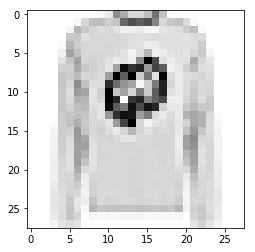

In [12]:
n = 123
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

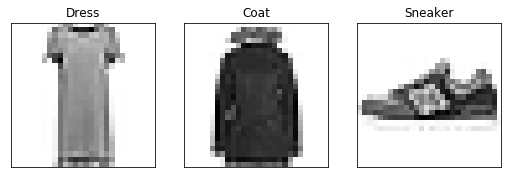

In [25]:
pick = np.random.choice(60000, 3, replace=False)
plt.figure(figsize=(15,10)) # 調整畫布的大小

for i in range(3):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=12)
    plt.imshow(x_train[n], cmap='Greys') 

### 3.資料整理
將圖片像素正規化
對輸出資料做one hot encoding

In [26]:
x_train = x_train.reshape(60000, 28, 28 ,1)/255
x_test = x_test.reshape(10000, 28,28,1 )/255
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [27]:
x_train[87].shape

(28, 28, 1)

In [28]:
y_train[87]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

### 4.打造神經網路

In [30]:
from keras.models import Sequential 
from keras.layers import Dense , Activation, Flatten 
from keras.optimizers import SGD
from keras.layers import Conv2D, MaxPooling2D, Dropout
model = Sequential()

Conv2D 與 MaxPooling2D，設計16/32 Filter和3*3的篩選機制

In [31]:
model.add(Conv2D(16, (3,3), padding='same',
                input_shape=(28,28,1),
                activation='relu'))

In [32]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [33]:
model.add(Conv2D(32, (3,3), padding='same',
                activation='relu'))

In [34]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [35]:
model.add(Conv2D(64, (3,3), padding='same',
                activation='relu'))

In [36]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [37]:
model.add(Flatten())

In [38]:
model.add(Dense(88, activation='relu'))

In [39]:
model.add(Dense(10, activation='softmax'))

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
__________

In [41]:
model.compile(loss='mse', optimizer=SGD(lr=0.1),
             metrics=['accuracy'])

In [42]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [43]:
model.fit (x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 31s 523us/step - loss: 0.0866 - acc: 0.2700
Epoch 2/10
60000/60000 [==============================] - 29s 483us/step - loss: 0.0511 - acc: 0.6249
Epoch 3/10
60000/60000 [==============================] - 28s 475us/step - loss: 0.0382 - acc: 0.7222
Epoch 4/10
60000/60000 [==============================] - 29s 479us/step - loss: 0.0340 - acc: 0.7575
Epoch 5/10
60000/60000 [==============================] - 31s 509us/step - loss: 0.0317 - acc: 0.7777
Epoch 6/10
60000/60000 [==============================] - 28s 467us/step - loss: 0.0297 - acc: 0.7937
Epoch 7/10
60000/60000 [==============================] - 29s 481us/step - loss: 0.0282 - acc: 0.8043
Epoch 8/10
60000/60000 [==============================] - 29s 490us/step - loss: 0.0271 - acc: 0.8112
Epoch 9/10
60000/60000 [==============================] - 27s 451us/step - loss: 0.0259 - acc: 0.8198
Epoch 10/10
60000/60000 [==============================] - 26s 441us/step - loss: 

### 5. 檢驗

In [44]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 3s 297us/step
Test loss: 0.02557586572766304
Test accuracy: 0.8217


In [47]:
result = model.predict_classes(x_test)
def my_predict(n):
    print('我的CNN預測是', class_names[result[n]])
    print('實際的標籤是', class_names[np.argmax(y_test[n])])
    X = x_test[n].reshape(28,28)
    plt.imshow(X, cmap = 'Greys')

In [48]:
from ipywidgets import interact_manual
interact_manual(my_predict, n = (0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>

In [ ]:
model.save('myCNNmodel.hw_2')